In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading csv file

In [2]:
data = pd.read_csv('technodom.csv', encoding='latin1')

In [3]:
data.head()

,Unnamed: 0,Name,Price,Rating out of 5
0,1,Samsung Galaxy Z Fold4 512GB Beige,1099990,0.0
1,11,Samsung Galaxy A03 32GB Black,69990,4.8
2,12,Texet TM-130 Black,6190,5.0
3,16,Samsung Galaxy A32 64GB Lavender,129990,4.8
4,26,Poco X4 Pro 256GB Laser Blue,179990,5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   Name             50 non-null     object 
 2   Price            50 non-null     int64  
 3   Rating out of 5  50 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data[["Brand", "Phone"]] = data["Name"].str.split(" ", n = 1, expand = True)

In [7]:
data.drop('Name', axis=1, inplace=True)

In [8]:
data.head()

,Price,Rating out of 5,Brand,Phone
0,1099990,0.0,Samsung,Galaxy Z Fold4 512GB Beige
1,69990,4.8,Samsung,Galaxy A03 32GB Black
2,6190,5.0,Texet,TM-130 Black
3,129990,4.8,Samsung,Galaxy A32 64GB Lavender
4,179990,5.0,Poco,X4 Pro 256GB Laser Blue


In [9]:
data = data.sort_values(by=['Brand'])
data.head()

,Price,Rating out of 5,Brand,Phone
20,769990,0.0,Apple,iPhone 14 Pro Max 128GB Gold
19,909990,5.0,Apple,iPhone 14 Pro 512GB Space Black
39,1049990,0.0,Apple,iPhone 14 Pro 1TB Space Black
40,839990,4.0,Apple,iPhone 14 Plus 512GB Starlight
25,769990,5.0,Apple,iPhone 14 Pro Max 128GB Space Black


### Data Visualization

Determine which smartphone brand is better in terms of rating and price, looking at the charts

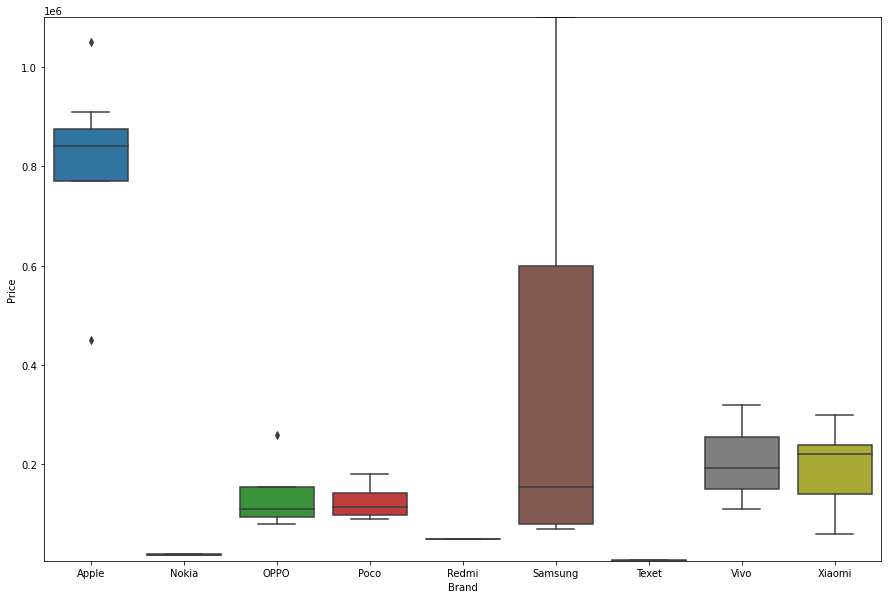

In [10]:
f, ax = plt.subplots(1, 1, figsize = (15, 10)) 
sns.boxplot(x = data['Brand'], y = data['Price'], data = data)
plt.ylim(6000, 1100000) 
plt.show()

We realized that for the price the Samsung brand has a large price range, as well as a rating above 4.5. OPPO and Xciomi brand phones have a low price compared to other phones and also have a good rating.

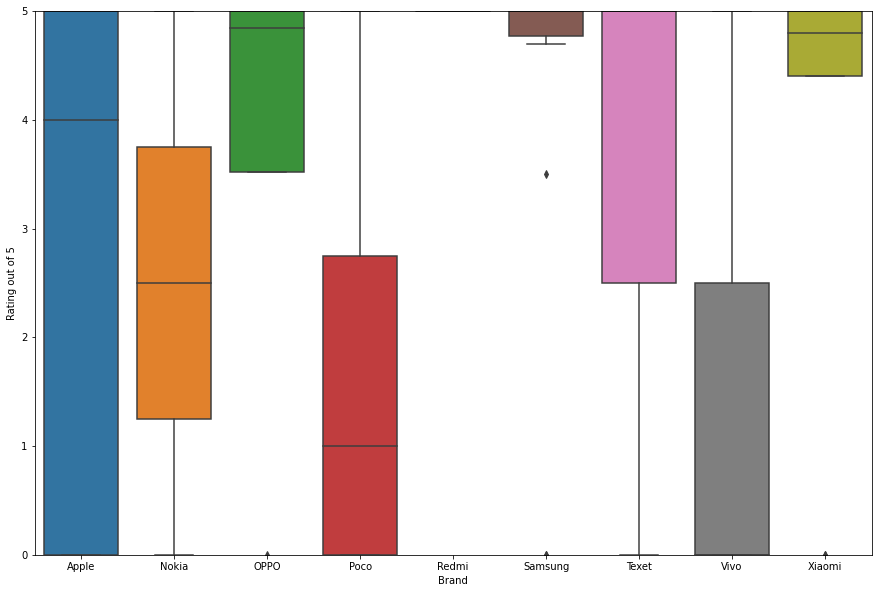

In [11]:
f, ax = plt.subplots(1, 1, figsize = (15, 10)) 
sns.boxplot(x = data['Brand'], y = data['Rating out of 5'], data = data)
plt.ylim(0, 5) 
plt.show()

##### TOP 10 by price and rating

In [12]:
top10 = data.nlargest(n=10,columns=['Price'])

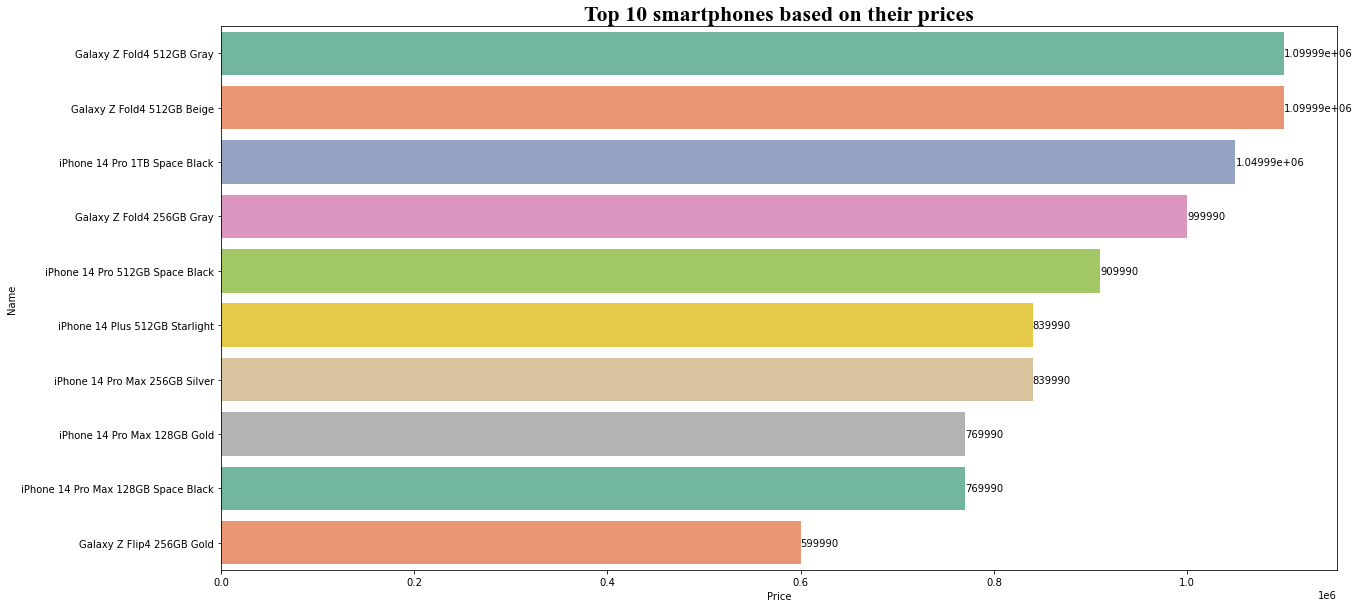

In [13]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Price', y='Phone',palette="Set2", data=top10)
ax.set_title('Top 10 smartphones based on their prices',fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Name')
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [14]:
top102 = data.nlargest(n=10,columns=['Rating out of 5'])

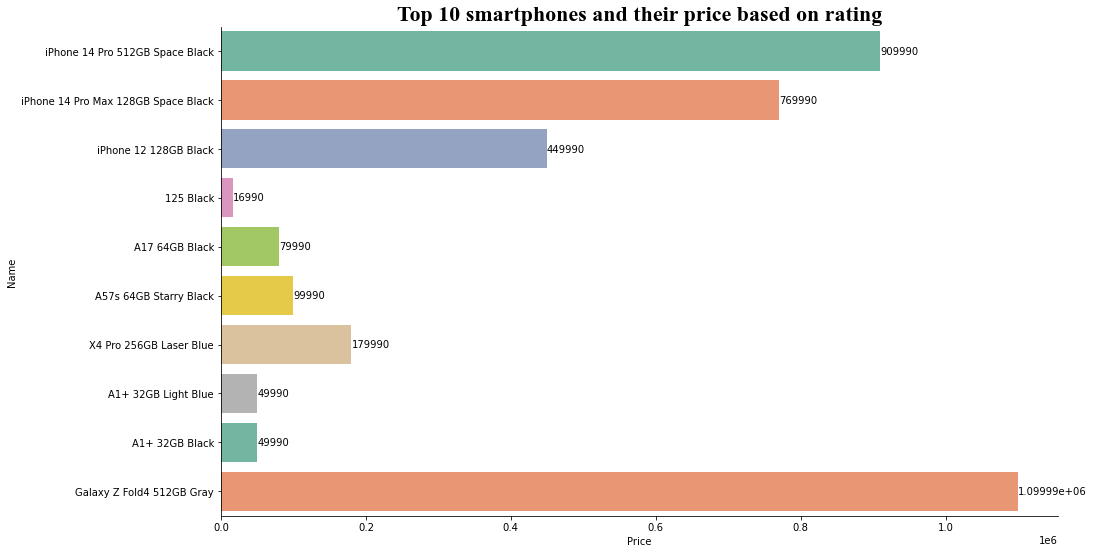

In [15]:
plt.figure(figsize=(15,9))
ax = sns.barplot(x='Price', y='Phone',palette="Set2", data=top102)
ax.set_title('Top 10 smartphones and their price based on rating',fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Name')
for i in ax.containers:
    ax.bar_label(i,)
    
sns.despine()
plt.show()

##### Pie chart to calculate which phone brands are many

In [23]:
brand = data['Brand'].value_counts()

In [24]:
brands = pd.DataFrame(brand)  

In [25]:
brands.reset_index(inplace=True)
brands.rename(columns = {'index':'Types','Brand':'Count'}, inplace = True) 
brands

,Types,Count
0,Samsung,16
1,Xiaomi,9
2,Apple,7
3,OPPO,4
4,Poco,4
5,Texet,3
6,Vivo,3
7,Nokia,2
8,Redmi,2


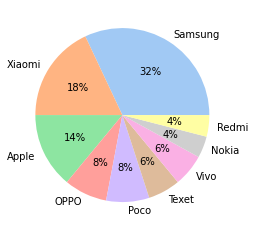

In [26]:
data = brands["Count"]
label = brands["Types"]
palette_color = sns.color_palette('pastel')
plt.pie(data, labels=label, colors=palette_color, autopct='%.0f%%')
plt.show()

##### ML part


In [16]:
data['Price'] = (data['Price'] // 100000)
print(data)

    Price  Rating out of 5    Brand                                Phone
20      7              0.0    Apple         iPhone 14 Pro Max 128GB Gold
19      9              5.0    Apple      iPhone 14 Pro 512GB Space Black
39     10              0.0    Apple        iPhone 14 Pro 1TB Space Black
40      8              4.0    Apple       iPhone 14 Plus 512GB Starlight
25      7              5.0    Apple  iPhone 14 Pro Max 128GB Space Black
44      8              0.0    Apple       iPhone 14 Pro Max 256GB Silver
13      4              5.0    Apple                iPhone 12 128GB Black
16      0              5.0    Nokia                            125 Black
9       0              0.0    Nokia                            150 Black
18      0              5.0     OPPO                       A17 64GB Black
5       2              4.7     OPPO      Reno 7 256GB 5G Startrails Blue
41      1              0.0     OPPO              A57s 128GB Starry Black
10      0              5.0     OPPO               A

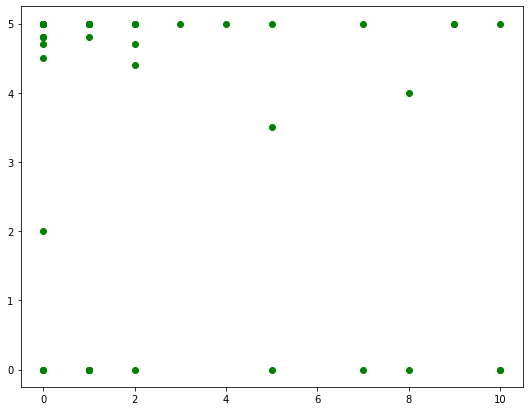

In [17]:
X_df = pd.DataFrame(data['Price'])
y_df = pd.DataFrame(data['Rating out of 5'])
plt.figure(figsize=(9,7))
plt.scatter(X_df, y_df, c='green')

In [18]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

In [19]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)
X_train = pd.DataFrame(training_data['Price'])
y_train = pd.DataFrame(training_data['Rating out of 5']) 
X_test = pd.DataFrame(testing_data['Price'])
y_test = pd.DataFrame(testing_data['Rating out of 5'])

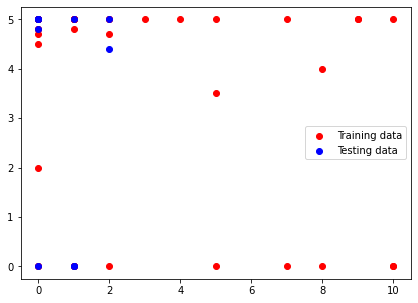

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, label='Training data', c = 'r')
plt.scatter(X_test, y_test, label='Testing data', c = 'b')
plt.legend()
plt.show()

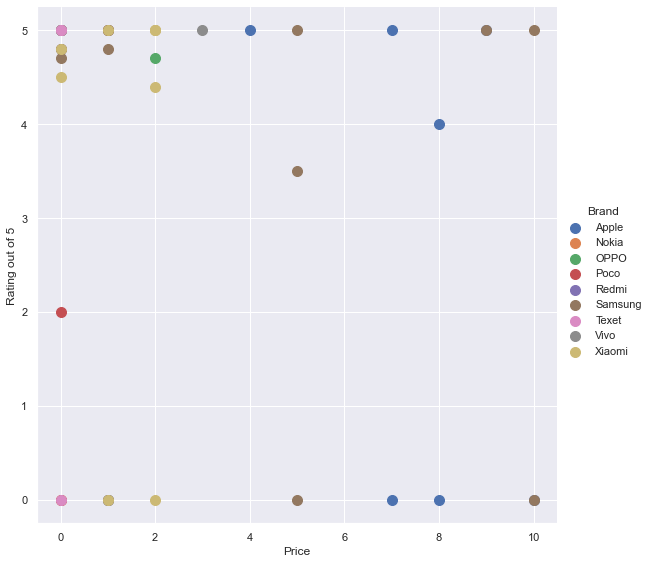

In [21]:
import seaborn as sns 
sns.set(font_scale=1.0) 
sns.FacetGrid(data, hue="Brand", height = 8).map(plt.scatter, "Price", "Rating out of 5", s=100).add_legend()  

In [22]:
X1 = data['Price'].values.reshape(-1,1)
y1 = data['Rating out of 5'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=0)

In [23]:
regression = lm.LinearRegression()  
regression.fit(X_train, y_train) 

LinearRegression()

In [24]:
y_pred = regression.predict(X_test)
df = pd.DataFrame({'population': y_test.flatten(), 'profit': y_pred.flatten()})

#### Linear Regression

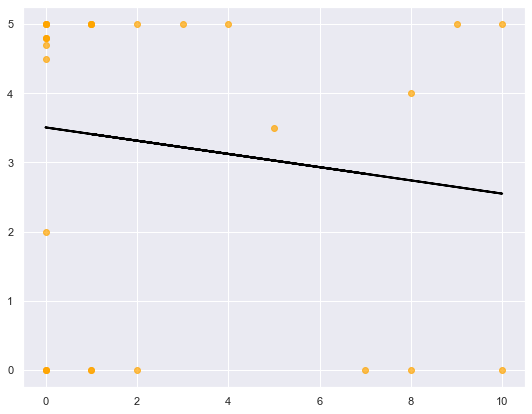

In [26]:
plt.figure(figsize=(9,7)) 
plt.scatter(X_train, y_train,  c='orange', alpha = .7)
plt.plot(X_test, y_pred, c='black', linewidth=2)
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
x=data[['Price', 'Rating out of 5']]
y=data['Brand']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=25)
np.unique(Y_train)

array(['Apple', 'Nokia', 'OPPO', 'Poco', 'Redmi', 'Samsung', 'Texet',
       'Vivo', 'Xiaomi'], dtype=object)

### SVM classifier

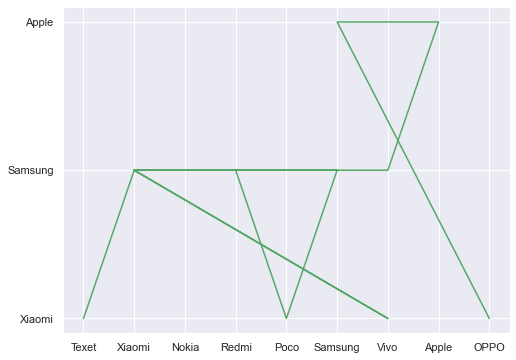

In [30]:
clf = SVC()
clf.fit(X_train, Y_train)
plt.figure(figsize=(8,6))
predictions=clf.predict(X_test) 
plt.plot(Y_test, predictions, c = 'g') 

In [31]:
print('Accuracy of training: ',accuracy_score(Y_train,clf.predict(X_train)))

Accuracy of training:  0.5142857142857142


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 4, 0, 0, 0]], dtype=int64)

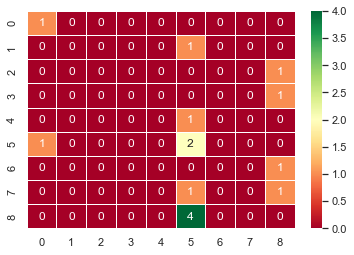

In [33]:
sns.heatmap(cm,annot=True, linewidths=1, cmap="RdYlGn")
plt.show()